# Team SLA

In [28]:
import os
HOME = os.getcwd()
print(HOME)
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

from IPython.display import display, Image
from google.colab import drive
drive.mount('/content/drive')
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.05 source='/content/drive/MyDrive/Data/3.jpg' save=True save_txt=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/107.7 GB disk)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
2023-05-20 05:47:01.141616: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-20 05:47:02.062850: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
image 1/1 /content/drive/MyDrive/Data/3.jpg: 640x384 3 bottles, 3 cups, 1 knife, 1 chair, 3 couchs, 1 potted plant, 1 dining table, 2 vases, 1 scissors, 12 teddy bears, 105.0ms
Speed: 1.3ms pre-process, 105.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Result

/content


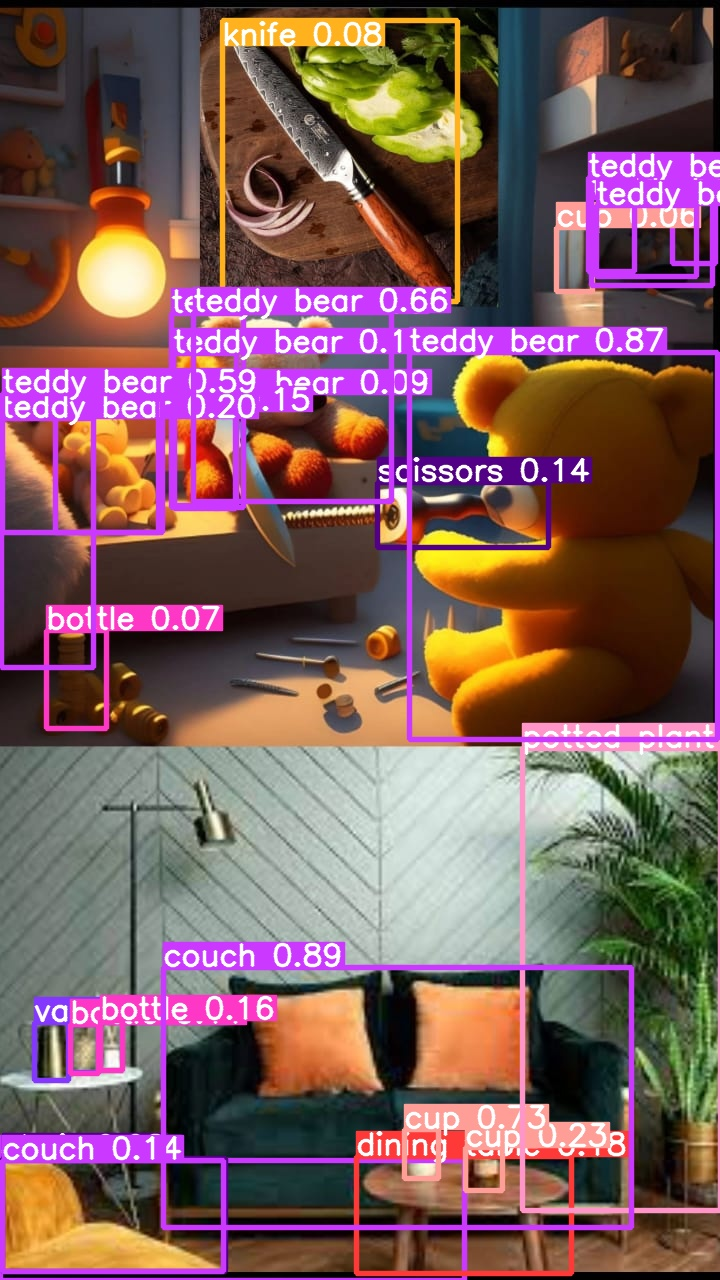

In [29]:
%cd {HOME}
Image(filename='runs/detect/predict/3.jpg', height=600)


In [32]:
import os
path="runs/detect/predict/labels/3.txt"
myfile=open(path,"r")
harmful=[43,42,76]
harmless=[49,47,59,60,57,51,41,45,58,77,39,]
count0=count1=count2=0
for line in myfile:
        if int(line[:2])in harmless:
            count0+=1
        elif int(line[:2])in harmful:
            count1+=1
  
        
myfile.close()
print("Harmless objects: ",count0)
print("Harmful objects: ",count1)
print("Total Objects: ",count1+count0)

Harmless objects:  23
Harmful objects:  2
Total Objects:  25


In [8]:
import os
HOME = os.getcwd()
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets/datasets


In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dIa1Q7p7MUF0u0CvXM1w")
project = rf.workspace("humanoid-x-slat-vit").project("team-sla")
dataset = project.version(3).download("yolov8")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Team-SLA-3 in yolov8:: 100%|██████████| 2254/2254 [00:00<00:00, 3430.00it/s]


## Custom Training

In [32]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=540 plots=True

/content/datasets
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/datasets/Team-SLA-3/data.yaml, epochs=100, patience=50, batch=16, imgsz=540, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=

In [1]:
!ls {HOME}/runs/detect/train/

ls: cannot access '{HOME}/runs/detect/train2/': No such file or directory


In [15]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content/datasets
2023-05-19 23:38:48.873979: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 23:38:49.882944: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11139516 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/datasets/Team-SLA-3/valid/labels.cache... 219 images, 0 backgrounds, 0 corrupt: 100% 219/219 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 535. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, no

## Inference with Custom Model

In [16]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content/datasets
2023-05-19 23:39:41.156229: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 23:39:42.412323: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11139516 parameters, 0 gradients, 28.5 GFLOPs
image 1/120 /content/datasets/datasets/Team-SLA-3/test/images/00-Signature_png.rf.5664194af9d06d200c70ef141457c573.jpg: 224x224 1 fork, 1 knife, 7.0ms
image 2/120 /content/datasets/datasets/Team-SLA-3/test/images/000325189-1_jpg.rf.e248b7a1f655597b7dced68876bbfe39.jpg: 224x224 3 apples, 7.5ms
image 3/120 /content/datasets/datasets/Team-SLA-3/test/images/02453185_png.rf.a41dff

In [30]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.2 source="/content/drive/MyDrive/Data/2.jpg" save=True

/content/datasets
2023-05-19 23:56:05.286989: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 23:56:06.151039: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11139516 parameters, 0 gradients, 28.5 GFLOPs
image 1/1 /content/drive/MyDrive/Data/2.jpg: 224x128 11 knifes, 2 scissorss, 55.9ms
Speed: 0.5ms pre-process, 55.9ms inference, 105.7ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict8


/content/datasets


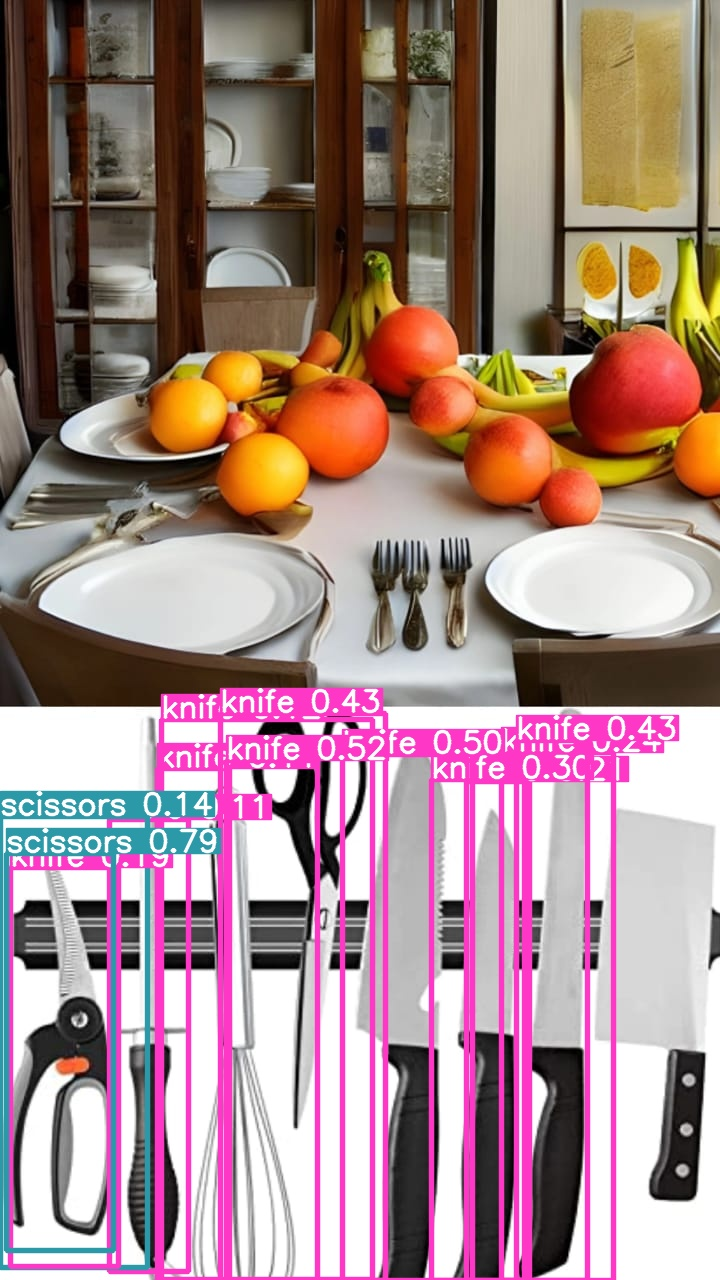

In [31]:
%cd {HOME}
Image(filename='runs/detect/predict8/2.jpg', height=600)